# Проект: Определение перспективного тарифа для телеком-компании

**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Инструкция по выполнению проекта**

**Шаг 1. Подготовьте данные**

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.

В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Шаг 2. Проанализируйте данные**

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Шаг 3. Проверьте гипотезы**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Для начала откроем файлы с данными и посмотрим на их содержимое.

In [2]:
# информация о пользователях
try:
    users = pd.read_csv('./data/users.csv')
except:
    users = pd.read_csv('./data/users.csv', sep='\t')

print('Всего данных:', users.shape[0])
users.sample(10)

Всего данных: 500


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
138,1138,23,NaN,Екатеринбург,Леся,Ерофеева,2018-07-13,smart
53,1053,64,NaN,Ростов-на-Дону,Ренальд,Фёдоров,2018-09-30,ultra
319,1319,70,NaN,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart
466,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
345,1345,31,NaN,Москва,Галина,Ёркина,2018-06-01,smart
483,1483,28,NaN,Ульяновск,Серафима,Борисова,2018-04-11,smart
36,1036,47,NaN,Санкт-Петербург,Анжелика,Андропова,2018-07-14,smart
11,1011,44,NaN,Самара,Веселина,Алёшко,2018-03-19,smart
280,1280,53,NaN,Астрахань,Артемий,Худяков,2018-07-18,smart
30,1030,28,NaN,Махачкала,Мариетта,Русанова,2018-05-23,smart


In [3]:
# информация о звонках
try:
    calls = pd.read_csv('./data/calls.csv')
except:
    calls = pd.read_csv('./data/calls.csv', sep='\t')
    
print('Всего данных:', calls.shape[0])
calls.sample(10)

Всего данных: 202607


,id,call_date,duration,user_id
39068,1097_400,2018-11-13,4.75,1097
96822,1247_145,2018-06-04,0.00,1247
17580,1048_370,2018-09-18,16.31,1048
5080,1014_72,2018-12-22,2.07,1014
80408,1200_311,2018-11-10,12.87,1200
129958,1332_269,2018-09-07,19.14,1332
84715,1211_176,2018-08-31,0.00,1211
16504,1045_226,2018-04-05,4.72,1045
124280,1319_429,2018-12-18,15.38,1319
64520,1166_181,2018-09-06,4.51,1166


In [4]:
# информация о сообщениях
try:
    messages = pd.read_csv('./data/messages.csv')
except:
    messages = pd.read_csv('./data/messages.csv', sep='\t')
    
print('Всего данных:', messages.shape[0])
messages.sample(10)

Всего данных: 123036


,id,message_date,user_id
112952,1457_1,2018-10-06,1457
61183,1270_56,2018-09-18,1270
48639,1215_66,2018-10-12,1215
114974,1471_202,2018-07-18,1471
120832,1490_54,2018-07-10,1490
117106,1476_34,2018-12-26,1476
88781,1372_201,2018-10-13,1372
95263,1392_103,2018-09-08,1392
64321,1277_998,2018-11-21,1277
112443,1453_468,2018-01-09,1453


In [5]:
# информация об интернет-сессиях
try:
    internet = pd.read_csv('./data/internet.csv')
except:
    internet = pd.read_csv('./data/internet.csv', sep='\t')
    
print('Всего данных:', internet.shape[0])
internet.sample(10)

Всего данных: 149396


,Unnamed: 0,id,mb_used,session_date,user_id
123569,123569,1415_177,785.96,2018-09-09,1415
120857,120857,1408_165,117.47,2018-12-29,1408
113261,113261,1383_69,188.38,2018-11-11,1383
12155,12155,1043_153,912.54,2018-11-11,1043
141675,141675,1475_398,480.56,2018-05-24,1475
111243,111243,1378_36,55.49,2018-10-03,1378
107068,107068,1363_114,486.06,2018-11-06,1363
66783,66783,1227_380,0.00,2018-09-04,1227
142519,142519,1477_416,839.05,2018-11-13,1477
36783,36783,1127_133,196.98,2018-06-24,1127


In [6]:
# информация о тарифах
try:
    tariffs = pd.read_csv('./data/tariffs.csv')
except:
    tariffs = pd.read_csv('./data/tariffs.csv', sep='\t')
    
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## 1 шаг. Подготовка данных

### 1.1 Приведение данных к нужным типам и исправление ошибок в данных

Посмотрим на типы данных наших таблиц, может нужно будет где-то поменять на другой тип.

Также сразу добавим столбец с месяцем от каждой даты в таблицах, так как нам придется проводить анализ за один год, поэтому понадобится информация по месяцам.

**Таблица users**

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# исправим данные с датой на соответствующий тип данных
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

users['churn_date'].info()
users['reg_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: churn_date
Non-Null Count  Dtype         
--------------  -----         
38 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: reg_date
Non-Null Count  Dtype         
--------------  -----         
500 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB


In [9]:
users['churn_month'] = users['churn_date'].dt.month_name()
users['reg_month'] = users['reg_date'].dt.month_name()

In [10]:
users.info()
# все хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff       500 non-null    object        
 8   churn_month  38 non-null     object        
 9   reg_month    500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 39.2+ KB


**Таблица calls**

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['call_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 202607 entries, 0 to 202606
Series name: call_date
Non-Null Count   Dtype         
--------------   -----         
202607 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [13]:
calls['call_month'] = calls['call_date'].dt.month_name()

Знаем, что нулевая продолжительность обозначается как пропущенный звонок, так что их не удаляем.

In [14]:
# также видим, что длительность звонка представлена в дробном типе данных
# можем исправить это, округлив данные как делают это провайдеры 
# (указано в примечании)
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [15]:
calls.info()
# все хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  int32         
 3   user_id     202607 non-null  int64         
 4   call_month  202607 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 7.0+ MB


**Таблица messages**

In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages['message_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 123036 entries, 0 to 123035
Series name: message_date
Non-Null Count   Dtype         
--------------   -----         
123036 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 961.3 KB


In [18]:
messages['message_month'] = messages['message_date'].dt.month_name()

In [19]:
messages.info()
# все хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             123036 non-null  object        
 1   message_date   123036 non-null  datetime64[ns]
 2   user_id        123036 non-null  int64         
 3   message_month  123036 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


**Таблица internet**

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
# есть столбец, который дублирует номера строк из импортируемой таблицы 
# он не нужен, удалим просто этот столбец
internet = internet.drop(columns='Unnamed: 0')

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

internet['session_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 149396 entries, 0 to 149395
Series name: session_date
Non-Null Count   Dtype         
--------------   -----         
149396 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [23]:
internet['session_month'] = internet['session_date'].dt.month_name()

In [24]:
# заменим мегабайты на гигабайты, как было указано в примечании
internet['mb_used'] = internet['mb_used'] / 1024

internet = internet.rename(columns={'mb_used': 'gb_used'})

In [25]:
# также округлим гигабайты в большую сторону, избавясь от дробной части
internet['gb_used'] = np.ceil(internet['gb_used']).astype('int')

In [26]:
internet.info()
# все хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             149396 non-null  object        
 1   gb_used        149396 non-null  int32         
 2   session_date   149396 non-null  datetime64[ns]
 3   user_id        149396 non-null  int64         
 4   session_month  149396 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 5.1+ MB


**Таблица tariffs**

In [27]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


In [28]:
# переведём мегабайты в гигабайты
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'})

In [29]:
# для дальнейшего удобства также поменяем название столбца tariff_name
tariffs = tariffs.rename(columns={'tariff_name' : 'tariff'})

In [30]:
tariffs.info()
# все хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   rub_monthly_fee        2 non-null      int64  
 4   rub_per_gb             2 non-null      int64  
 5   rub_per_message        2 non-null      int64  
 6   rub_per_minute         2 non-null      int64  
 7   tariff                 2 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 260.0+ bytes


### 1.2 Расчеты

Рассчитаем **количество сделанных звонков и израсходованных минут разговора по месяцам**.

Также если для пользователя в каком-то месяце нет звонков, заполним эти ячейки нулями.

In [31]:
calls_pivot = calls.pivot_table(
    index = ['user_id','call_month'],
    values = 'duration',
    aggfunc = ['count', 'sum'],
    fill_value = 0
).reset_index()

calls_pivot.columns = ['user_id', 'month', 'calls', 'minutes']

calls_pivot

,user_id,month,calls,minutes
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159
...,...,...,...,...
3169,1498,September,59,471
3170,1499,December,69,492
3171,1499,November,74,612
3172,1499,October,68,449


Теперь рассчитаем **количество отправленных сообщений по месяцам**.

In [32]:
messages_pivot = messages.pivot_table(
    index = ['user_id','message_month'],
    values = 'id',
    aggfunc = 'count',
    fill_value = 0
).reset_index().rename(columns={'id': 'messages', 'message_month': 'month'})

messages_pivot

,user_id,month,messages
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
...,...,...,...
2712,1498,September,44
2713,1499,December,66
2714,1499,November,59
2715,1499,October,48


Рассчитаем **объем израсходованного интернет-трафика по месяцам**.

In [33]:
internet_pivot = internet.pivot_table(
    index = ['user_id','session_month'],
    values = 'gb_used',
    aggfunc = 'sum',
    fill_value = 0
).reset_index().rename(columns={'session_month': 'month'})

internet_pivot

,user_id,month,gb_used
0,1000,August,27
1,1000,December,19
2,1000,July,28
3,1000,June,49
4,1000,May,4
...,...,...,...
3198,1498,September,58
3199,1499,December,40
3200,1499,November,41
3201,1499,October,44


Теперь рассчитаем **помесячную выручку с каждого пользователя**.

In [34]:
# для начала объеденим всё в одну таблицу
data = pd.merge(calls_pivot, messages_pivot, on=['user_id','month'], how='outer').fillna(0)
data = pd.merge(data, internet_pivot, on=['user_id','month'], how='outer').fillna(0)

# добавим также данные из таблицы пользователей
data = pd.merge(data, users[['user_id','tariff','city']], on='user_id')

# теперь объединим таблицу с tariffs
data = pd.merge(data, tariffs, on='tariff', how='left')

print(data.head(10))
data.info()

   user_id      month  calls  minutes  messages  gb_used tariff       city  \
0     1000     August   52.0    408.0      81.0     27.0  ultra  Краснодар   
1     1000   December   46.0    333.0      70.0     19.0  ultra  Краснодар   
2     1000       July   47.0    340.0      75.0     28.0  ultra  Краснодар   
3     1000       June   43.0    172.0      60.0     49.0  ultra  Краснодар   
4     1000        May   22.0    159.0      22.0      4.0  ultra  Краснодар   
5     1000   November   43.0    338.0      58.0     27.0  ultra  Краснодар   
6     1000    October   57.0    350.0      73.0     28.0  ultra  Краснодар   
7     1000  September   58.0    466.0      57.0     26.0  ultra  Краснодар   
8     1001   December   63.0    414.0       0.0     35.0  smart     Москва   
9     1001   November   59.0    430.0       0.0     47.0  smart     Москва   

   messages_included  gb_per_month_included  minutes_included  \
0               1000                   30.0              3000   
1          

In [35]:
data['calls'] = data.calls.astype('int')
data['minutes'] = data.minutes.astype('int')
data['messages'] = data.messages.astype('int')
data['gb_used'] = data.gb_used.astype('int')
data['gb_per_month_included'] = data.gb_per_month_included.astype('int')

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   object
 2   calls                  3214 non-null   int32 
 3   minutes                3214 non-null   int32 
 4   messages               3214 non-null   int32 
 5   gb_used                3214 non-null   int32 
 6   tariff                 3214 non-null   object
 7   city                   3214 non-null   object
 8   messages_included      3214 non-null   int64 
 9   gb_per_month_included  3214 non-null   int32 
 10  minutes_included       3214 non-null   int64 
 11  rub_monthly_fee        3214 non-null   int64 
 12  rub_per_gb             3214 non-null   int64 
 13  rub_per_message        3214 non-null   int64 
 14  rub_per_minute         3214 non-null   int64 
dtypes: int32(5), int64(7)

,user_id,month,calls,minutes,messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,52,408,81,27,ultra,Краснодар,1000,30,3000,1950,150,1,1
1,1000,December,46,333,70,19,ultra,Краснодар,1000,30,3000,1950,150,1,1
2,1000,July,47,340,75,28,ultra,Краснодар,1000,30,3000,1950,150,1,1
3,1000,June,43,172,60,49,ultra,Краснодар,1000,30,3000,1950,150,1,1
4,1000,May,22,159,22,4,ultra,Краснодар,1000,30,3000,1950,150,1,1
5,1000,November,43,338,58,27,ultra,Краснодар,1000,30,3000,1950,150,1,1
6,1000,October,57,350,73,28,ultra,Краснодар,1000,30,3000,1950,150,1,1
7,1000,September,58,466,57,26,ultra,Краснодар,1000,30,3000,1950,150,1,1
8,1001,December,63,414,0,35,smart,Москва,50,15,500,550,200,3,3
9,1001,November,59,430,0,47,smart,Москва,50,15,500,550,200,3,3


*Чтобы рассчитать помесячную выручку с каждого пользователя, нужно вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану.*

In [36]:
# напишем функцию для расчета помесячной выручки
def calculate_revenue(row):
    # вычислим сверхлимитные звонки, сообщения и интернет
    extra_minutes = max(0, row['minutes'] - row['minutes_included'])
    extra_messages = max(0, row['messages'] - row['messages_included'])
    extra_gb = max(0, row['gb_used'] - row['gb_per_month_included'])
    
    # рассчитаем выручку за сверхлимитные услуги
    revenue_minutes = extra_minutes * row['rub_per_minute']
    revenue_messages = extra_messages * row['rub_per_message']
    revenue_gb = extra_gb * row['rub_per_gb']
    
    # полная выручка за месяц = абонентская плата + выручка за сверхлимиты
    total_revenue = row['rub_monthly_fee'] + revenue_minutes + revenue_messages + revenue_gb
    
    return total_revenue


# применим нашу функцию к каждому пользователю в каждом месяце
data['monthly_revenue'] = data.apply(calculate_revenue, axis=1)
# добавим столбец с годовой выручкой
data['yearly_revenue'] = data.groupby('user_id')['monthly_revenue'].transform('sum')

data[['user_id','month','monthly_revenue','yearly_revenue']].sample(10)

,user_id,month,monthly_revenue,yearly_revenue
624,1099,October,1950,23250
2978,1468,July,5750,42850
1538,1247,December,9273,61155
585,1094,December,3900,27600
1656,1266,August,6350,30274
1141,1180,December,5850,74100
3005,1472,April,8050,93328
2360,1377,August,1950,21450
2324,1373,March,10365,92263
437,1068,August,11316,53331


**Вывод по 1 шагу:**

На этом этапе подготовлены данные для дальнейшего анализа, устранены возможные проблемы с типами данных и произведены все расчёты для каждого пользователя. В результате получены агрегированные данные по месяцам, на основании которых можно строить дальнейший анализ поведения клиентов и выручки для тарифов «Смарт» и «Ультра».

## 2 шаг. Анализ данных

Для анализа поведения клиентов, исходя из данных по тарифам "Смарт" и "Ультра", необходимо выполнить следующие шаги:
1) Рассчитать средние значения, дисперсию и стандартное отклонение для количества минут, сообщений и интернет-трафика по каждому тарифу.
2) Построить гистограммы для визуализации распределений.
3) Описать результаты на основе полученных данных.

Создадим две таблицы на основе нашей data: одну с трафиком ultra, другую с smart.

In [37]:
ultra = data[data['tariff'] == 'ultra']
ultra

,user_id,month,calls,minutes,messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,yearly_revenue
0,1000,August,52,408,81,27,ultra,Краснодар,1000,30,3000,1950,150,1,1,1950,18450
1,1000,December,46,333,70,19,ultra,Краснодар,1000,30,3000,1950,150,1,1,1950,18450
2,1000,July,47,340,75,28,ultra,Краснодар,1000,30,3000,1950,150,1,1,1950,18450
3,1000,June,43,172,60,49,ultra,Краснодар,1000,30,3000,1950,150,1,1,4800,18450
4,1000,May,22,159,22,4,ultra,Краснодар,1000,30,3000,1950,150,1,1,1950,18450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,August,0,0,17,25,ultra,Красноярск,1000,30,3000,1950,150,1,1,1950,11700
3205,1473,December,0,0,20,32,ultra,Красноярск,1000,30,3000,1950,150,1,1,2250,11700
3206,1473,November,0,0,14,40,ultra,Красноярск,1000,30,3000,1950,150,1,1,3450,11700
3207,1473,October,0,0,20,29,ultra,Красноярск,1000,30,3000,1950,150,1,1,1950,11700


In [38]:
smart = data[data['tariff'] == 'smart']
smart

,user_id,month,calls,minutes,messages,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,yearly_revenue
8,1001,December,63,414,0,35,smart,Москва,50,15,500,550,200,3,3,4550,11500
9,1001,November,59,430,0,47,smart,Москва,50,15,500,550,200,3,3,6950,11500
10,1002,August,42,289,13,50,smart,Стерлитамак,50,15,500,550,200,3,3,7550,42650
11,1002,December,33,236,12,52,smart,Стерлитамак,50,15,500,550,200,3,3,7950,42650
12,1002,July,26,214,11,45,smart,Стерлитамак,50,15,500,550,200,3,3,6550,42650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,August,0,0,17,28,smart,Санкт-Петербург,50,15,500,550,200,3,3,3150,31950
3210,1489,December,0,0,35,45,smart,Санкт-Петербург,50,15,500,550,200,3,3,6550,31950
3211,1489,November,0,0,20,46,smart,Санкт-Петербург,50,15,500,550,200,3,3,6750,31950
3212,1489,October,0,0,21,52,smart,Санкт-Петербург,50,15,500,550,200,3,3,7950,31950


### 2.1 Расчет статистических показателей

Для каждого тарифа нужно рассчитать следующие статистические показатели:
- Среднее количество минут разговора, сообщений и объема интернет-трафика.
- Дисперсия и стандартное отклонение для этих же показателей.

In [39]:
# функция для расчета метрик
def describe_tariff(data, feature):
    mean = data[feature].mean()
    variance = data[feature].var()
    stddev = data[feature].std(ddof=1)
    return mean, variance, stddev

# рассчитаем показатели для тарифа smart
smart_minutes_stats = describe_tariff(smart, 'minutes')
smart_messages_stats = describe_tariff(smart, 'messages')
smart_gb_stats = describe_tariff(smart, 'gb_used')

# рассчитаем показатели для тарифа ultra
ultra_minutes_stats = describe_tariff(ultra, 'minutes')
ultra_messages_stats = describe_tariff(ultra, 'messages')
ultra_gb_stats = describe_tariff(ultra, 'gb_used')

# выведем средние значения, дисперсии и стандартные отклонения
print('Тариф "Смарт" (минуты):', smart_minutes_stats)
print('Тариф "Смарт" (сообщения):', smart_messages_stats)
print('Тариф "Смарт" (интернет):', smart_gb_stats)

print('Тариф "Ультра" (минуты):', ultra_minutes_stats)
print('Тариф "Ультра" (сообщения):', ultra_messages_stats)
print('Тариф "Ультра" (интернет):', ultra_gb_stats)

Тариф "Смарт" (минуты): (417.9349484073576, 36219.315784344246, 190.3137298892128)
Тариф "Смарт" (сообщения): (33.384028712427096, 796.8129584480083, 28.22787555676141)
Тариф "Смарт" (интернет): (42.4181247196052, 223.29636793596418, 14.943104360739913)
Тариф "Ультра" (минуты): (526.6233502538071, 100873.63339730087, 317.60609785912624)
Тариф "Ультра" (сообщения): (49.36345177664975, 2285.266142544682, 47.80445735017481)
Тариф "Ультра" (интернет): (38.16446700507614, 382.7757686434729, 19.564656108489945)


**Минуты разговора:** Пользователи тарифа "Ультра" в среднем разговаривают больше (526.62 минут) по сравнению с тарифом "Смарт" (417.93 минут). Это может указывать на то, что пользователи "Ультра" более активно используют телефон для звонков.

**Сообщения:** Среднее количество сообщений для пользователей тарифа "Ультра" составляет 49.36, что немного выше, чем для пользователей "Смарт" (33.38 сообщений). Это может говорить о том, что клиенты "Ультра" также больше используют текстовые сообщения.

**Интернет-трафик:** В среднем, пользователи тарифа "Смарт" потребляют 42.42 ГБ интернет-трафика, что значительно превышает лимит в 15 ГБ. В то время как пользователи "Ультра" в среднем используют 38.16 ГБ, что также близко к лимиту в 30 ГБ.

На основании проведенного анализа видно, что пользователи тарифа "Ультра" имеют более высокие средние значения по количеству минут и сообщений, что может говорить о более активном использовании услуг связи (но по большей части в пределах лимита). Однако, пользователи тарифа "Смарт" сталкиваются с высоким уровнем перерасхода, особенно по интернет-трафику, что приводит к дополнительным затратам. 

### 2.2 Построение гистограмм для визуализации распределений

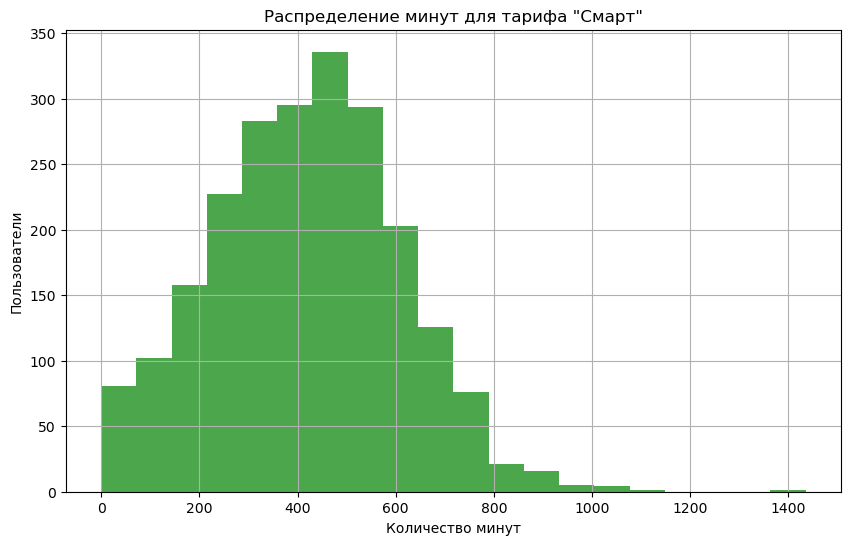

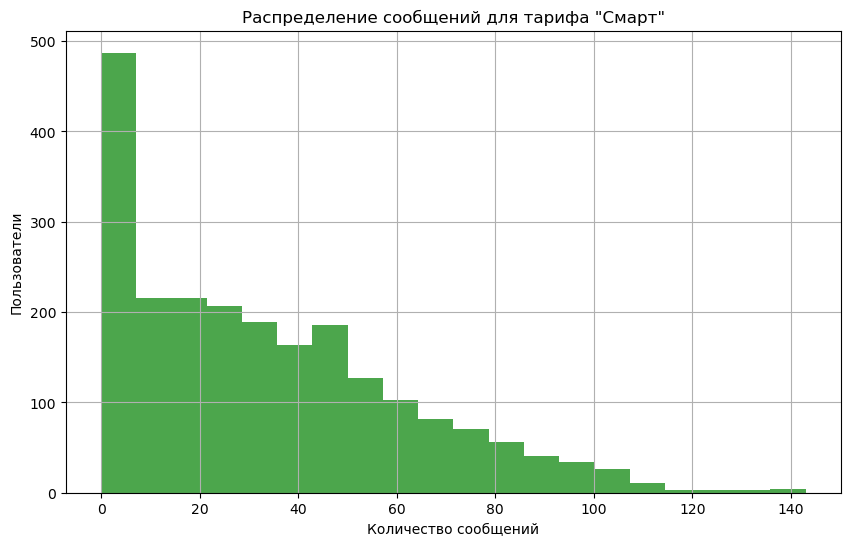

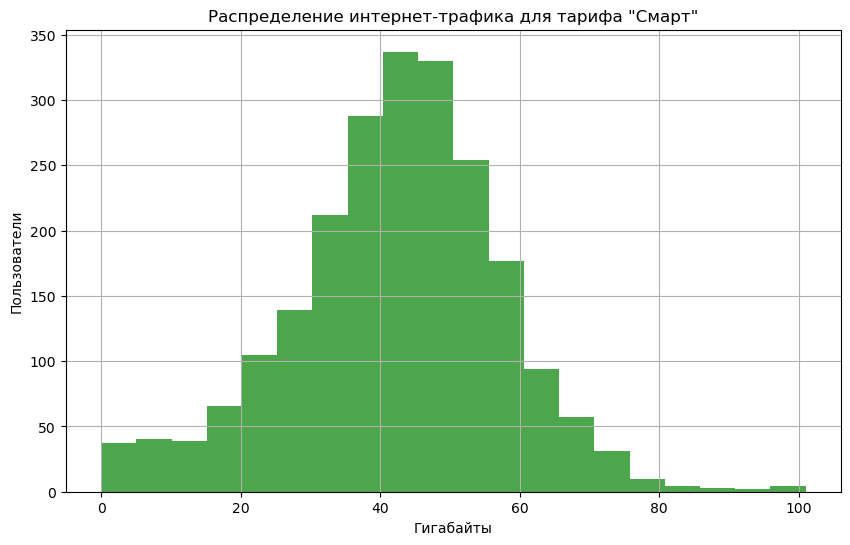

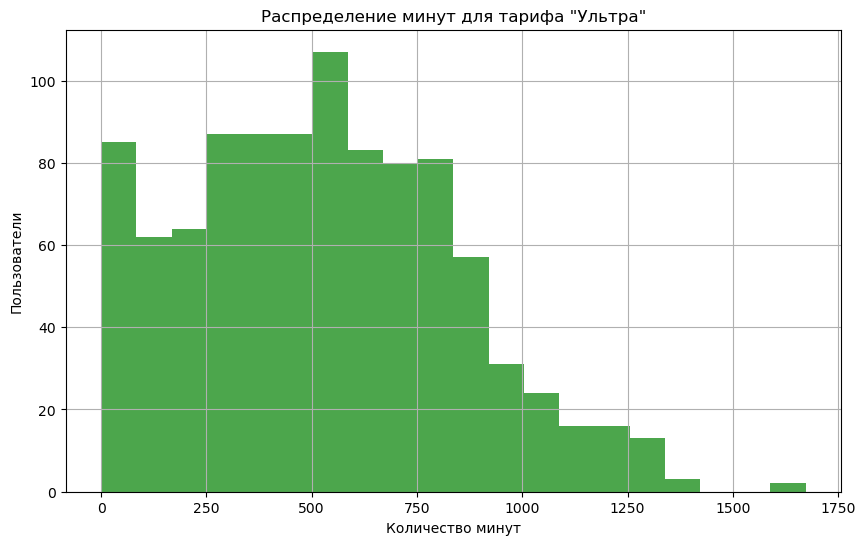

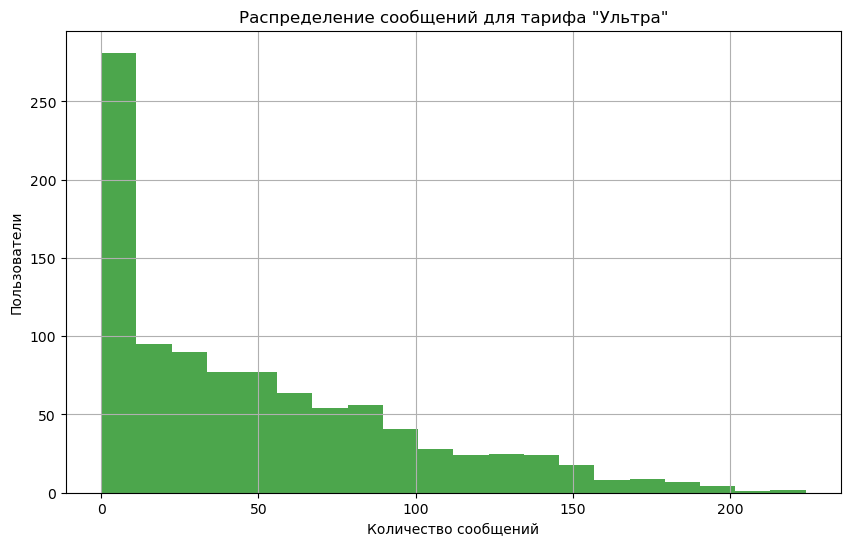

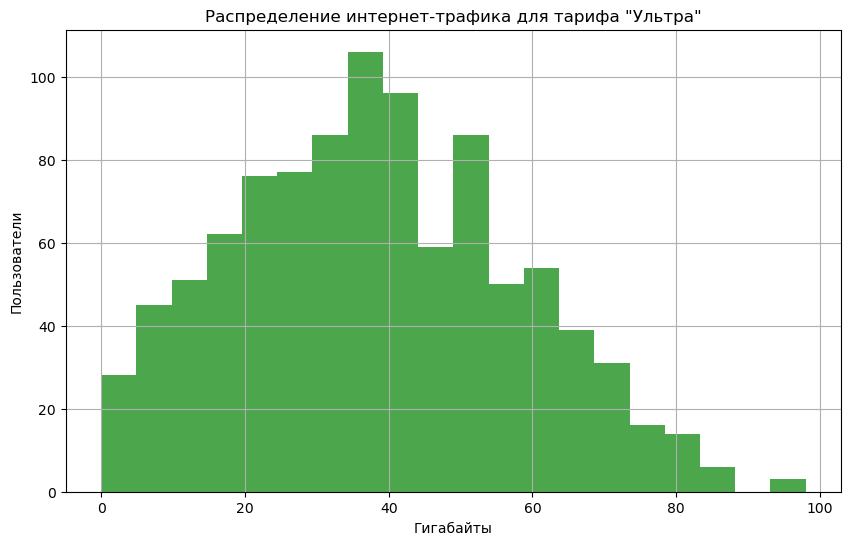

In [40]:
# функция для построения гистограммы
def plot_histogram(data, feature, title, xlabel):
    plt.figure(figsize=(10,6))
    plt.hist(data[feature], bins=20, alpha=0.7, color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Пользователи')
    plt.grid(True)
    plt.show()
    
plot_histogram(smart, 'minutes', 'Распределение минут для тарифа "Смарт"', 'Количество минут')
plot_histogram(smart, 'messages', 'Распределение сообщений для тарифа "Смарт"', 'Количество сообщений')
plot_histogram(smart, 'gb_used', 'Распределение интернет-трафика для тарифа "Смарт"', 'Гигабайты')

plot_histogram(ultra, 'minutes', 'Распределение минут для тарифа "Ультра"', 'Количество минут')
plot_histogram(ultra, 'messages', 'Распределение сообщений для тарифа "Ультра"', 'Количество сообщений')
plot_histogram(ultra, 'gb_used', 'Распределение интернет-трафика для тарифа "Ультра"', 'Гигабайты')

### 2.3 Описание распределений

На основе полученных данных и гистограмм, можно сделать следующие выводы:

1. **Тариф «Смарт»:**

- *Среднее количество минут:* Для тарифа "Смарт" гистограмма имеет правостороннюю асимметрию. Большая часть клиентов использует количество минут близкое к включенному лимиту (500 минут), но число пользователей выходит за рамки этого лимита, что приводит к увеличению выручки. Это видно по "хвосту" распределения, который вытянут вправо.
- *Среднее количество сообщений:* На гистограмме для тарифа "Смарт" также присутствует правосторонняя асимметрия, так как пользователи часто не достигают включенных 50 сообщений, но некоторые выходят за пределы этого лимита, увеличивая расходы на дополнительные сообщения.
- *Среднее потребление интернет-трафика:* Пользователи тарифа "Смарт" активно превышают лимит в 15 Гб, что приводит к правосторонней асимметрии. Пользователи тарифа "Смарт" потребляют в среднем около 40-45 ГБ трафика. Часть клиентов регулярно доплачивает за дополнительные гигабайты, что отражается в вытянутом хвосте гистограммы.

2. **Тариф «Ультра»:**

- *Среднее количество минут:* Для тарифа "Ультра" распределение более концентрировано около среднего значения. Поскольку включено 3000 минут, большинство пользователей не использует это количество, оставаясь в пределах предоставленных минут. Это делает распределение более узким и симметричным.
- *Среднее количество сообщений:* Количество отправленных сообщений (в среднем около 60 сообщений в месяц, а также больше 250 пользователей вообще не пользуются сообщениями) значительно ниже лимита в 1000 сообщений.
- *Среднее потребление интернет-трафика:* Пользователи потребляют в среднем около 40 ГБ трафика, что выше лимита тарифа (30 ГБ).

**Вывод по 2 шагу:**

Для пользователей тарифа "Смарт" наблюдается значительная вариативность в использовании минут, сообщений и интернет-трафика. Среднее использование минут часто превышает лимит, что приводит к дополнительным расходам и, соответственно, повышению месячной выручки.

Пользователи тарифа "Ультра" чаще остаются в рамках включённого пакета, так как лимиты более щедрые. Однако при перерасходе интернет-трафика выручка возрастает, но таких случаев меньше по сравнению с тарифом "Смарт".

## 3 шаг. Проверка гипотез

### Гипотеза 1:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**H0:** Средняя выручка пользователей тарифов одинакова

**H1:** Средняя выручка пользователей тарифов различается

Критичиский уровень значимости установим в 5%. Если p-value будет меньше критического уровня вероятности, то нулевую гипотезу о равенстве отвергнем. В ином случае, данные не позволили отвергнуть нулевую гипотезу.

In [41]:
# годовая выручка пользователей тарифа Смарт
smart_revenue = smart['yearly_revenue']

# годовая выручка пользователей тарифа Ультра
ultra_revenue = ultra['yearly_revenue']

# t-тест для независимых выборок
alpha = 0.05
results = stats.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка различается")
else:
    print("Не отвергаем нулевую гипотезу: средняя выручка не различается")

p-value: 1.0108079993894959e-119
Отвергаем нулевую гипотезу: средняя выручка различается


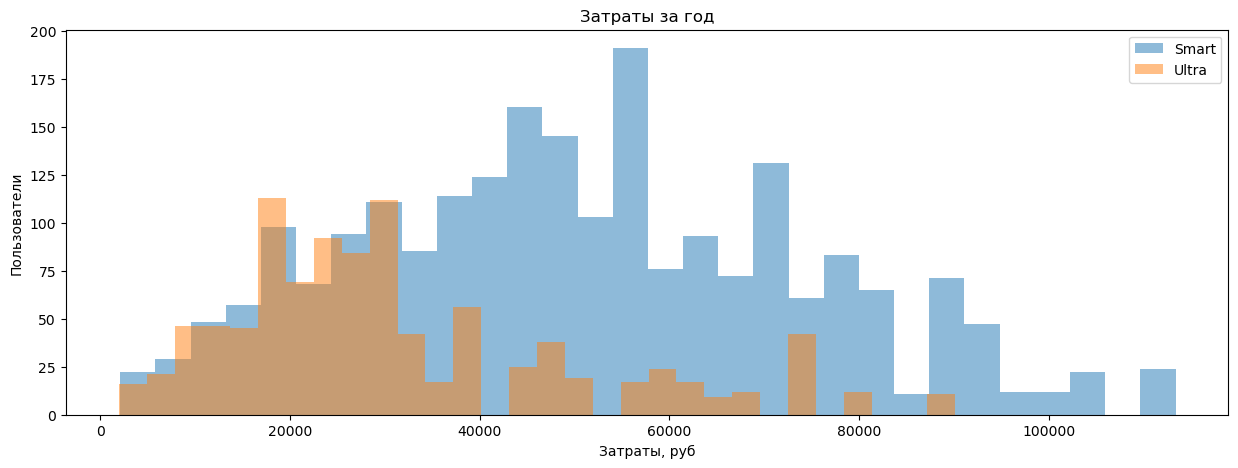

In [42]:
# график распределения по тарифам за год
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart['yearly_revenue'], 30, alpha=0.5, label='Smart')
ax.hist(ultra['yearly_revenue'], 30, alpha=0.5, label='Ultra')
plt.title('Затраты за год')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.ticklabel_format(style='plain')
plt.show()

In [43]:
# месячная выручка пользователей тарифа Смарт
smart_revenue = smart['monthly_revenue']

# месячная выручка пользователей тарифа Ультра
ultra_revenue = ultra['monthly_revenue']

# t-тест для независимых выборок
alpha = 0.05
results = stats.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка различается")
else:
    print("Не отвергаем нулевую гипотезу: средняя выручка не различается")

p-value: 3.366123216919074e-132
Отвергаем нулевую гипотезу: средняя выручка различается


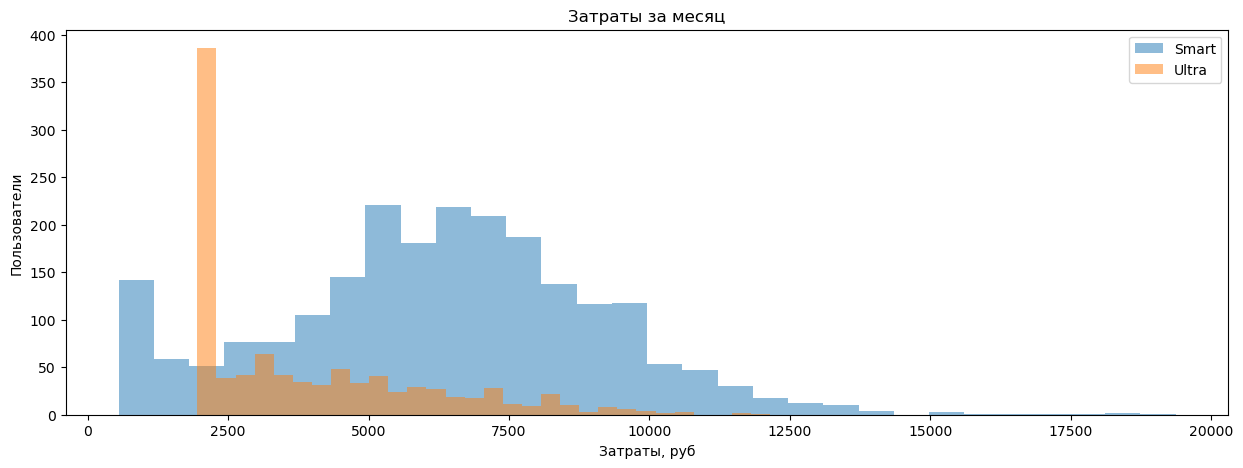

In [44]:
# график распределения по тарифам за месяц
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart['monthly_revenue'], 30, alpha=0.5, label='Smart')
ax.hist(ultra['monthly_revenue'], 30, alpha=0.5, label='Ultra')
plt.title('Затраты за месяц')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.ticklabel_format(style='plain')
plt.show()

Проверим ещё гипотезу:

**H0:** Средняя выручка пользователей тарифов одинакова

**H1:** Средняя выручка пользователей тарифа "Смарт" больше, чем тарифа "Ультра"

In [45]:
# месячная выручка пользователей тарифа Смарт
smart_revenue = smart['monthly_revenue']

# месячная выручка пользователей тарифа Ультра
ultra_revenue = ultra['monthly_revenue']

# t-тест односторонний
alpha = 0.05
results = stats.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

print('p-value:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только если выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue / 2 < alpha) and (smart_revenue.mean() > ultra_revenue.mean()):
    print("Отвергаем нулевую гипотезу: средняя выручка тарифа 'Смарт' больше")
else:
    print("Не отвергаем нулевую гипотезу: средняя выручка одинакова")

p-value: 1.683061608459537e-132
Отвергаем нулевую гипотезу: средняя выручка тарифа 'Смарт' больше


### Гипотеза 2:
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**H0:** Средняя выручка пользователей из Москвы и других регионов одинакова

**H1:** Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Критичиский уровень значимости установим в 5%. Если p-value будет меньше критического уровня вероятности, то нулевую гипотезу о равенстве отвергнем. В ином случае, данные не позволили отвергнуть нулевую гипотезу.

In [46]:
# годовая выручка пользователей из Москвы
moscow_revenue = data[data['city'] == 'Москва']['yearly_revenue']

# годовая выручка пользователей из других регионов
other_revenue = data[data['city'] != 'Москва']['yearly_revenue']

# t-тест для независимых выборок
alpha = 0.05
results = stats.ttest_ind(moscow_revenue, other_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка отличается")
else:
    print("Не отвергаем нулевую гипотезу: средняя выручка не отличается")

p-value: 0.18115193559827075
Не отвергаем нулевую гипотезу: средняя выручка не отличается


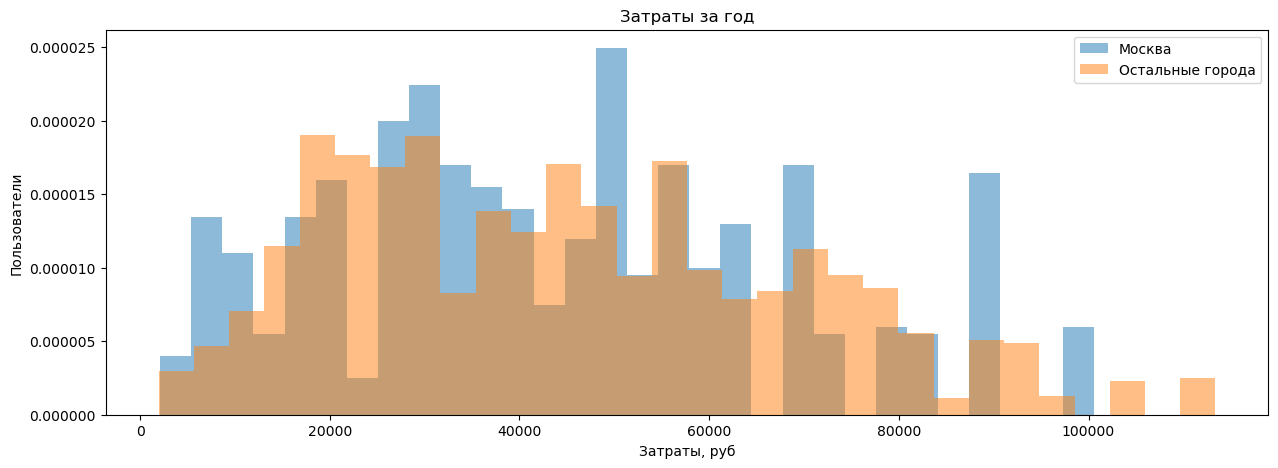

In [47]:
# график распределения по местонахождению за год
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(data[data['city'] == 'Москва']['yearly_revenue'], 30, alpha=0.5, label='Москва', density=True)
ax.hist(data[data['city'] != 'Москва']['yearly_revenue'], 30, alpha=0.5, label='Остальные города', density=True)
plt.title('Затраты за год')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.ticklabel_format(style='plain')
plt.show()

In [48]:
# месячная выручка пользователей из Москвы
moscow_revenue = data[data['city'] == 'Москва']['monthly_revenue']

# месячная выручка пользователей из других регионов
other_revenue = data[data['city'] != 'Москва']['monthly_revenue']

# t-тест для независимых выборок
alpha = 0.05
results = stats.ttest_ind(moscow_revenue, other_revenue, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка отличается")
else:
    print("Не отвергаем нулевую гипотезу: средняя выручка не отличается")

p-value: 0.25438147756433427
Не отвергаем нулевую гипотезу: средняя выручка не отличается


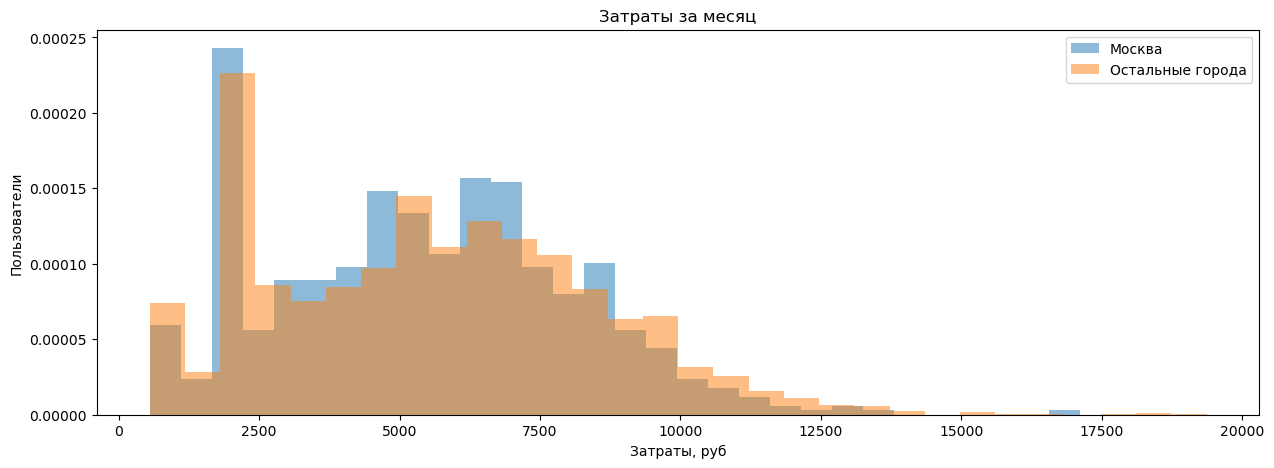

In [49]:
# график распределения по местонахождению за месяц
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(data[data['city'] == 'Москва']['monthly_revenue'], 30, alpha=0.5, label='Москва', density=True)
ax.hist(data[data['city'] != 'Москва']['monthly_revenue'], 30, alpha=0.5, label='Остальные города', density=True)
plt.title('Затраты за месяц')
plt.xlabel('Затраты, руб')
plt.ylabel('Пользователи')
plt.legend(loc='upper right')
plt.ticklabel_format(style='plain')
plt.show()

**Вывод по 3 шагу:**

*1 гипотеза:* Мы верно отвегли нулевую гипотезу, так как видно нашими графиками распределения, что средняя выручка по тарифам действительно **различается**. По дополнительной проверке мы также узнали, что именно выручка с тарифа "Смарт" больше.

*2 гипотеза:* Средняя выручка в зависимости из Москвы пользователь или из другого города **не отличается**, как видим по графикам действительно они почти схожи.

На основе проведенных тестов по данным из нашей выборке из 500 пользователей нельзя сделать однозначный вывод. Для более точного анализа необходимо изучить большее количество пользователей.

## Вывод

Для анализа поведения клиентов и определения лучшего тарифа мы рассмотрели следующие параметры:

**Среднее количество минут, сообщений и интернет-трафика:**

- Пользователи тарифа "Смарт" в среднем использовали 417 минут, 33 сообщения и 42 Гб трафика в месяц.
- Пользователи тарифа "Ультра" использовали в среднем 526 минут, 49 сообщений и 38 Гб трафика.

**Перерасход лимитов:**

- У пользователей тарифа "Смарт" часто наблюдается перерасход включённых минут, сообщений и интернет-трафика, что приводит к дополнительным расходам.
- Пользователи тарифа "Ультра" реже выходят за пределы включённых лимитов, благодаря более щедрым условиям тарифа.

**Выручка:**

- Средняя месячная выручка с пользователей тарифа "Смарт" выше из-за частого превышения лимитов, что приводит к дополнительным начислениям.
- Несмотря на высокую абонентскую плату тарифа "Ультра", пользователи этого тарифа реже платят за дополнительные услуги.

**Заключение:**

Тариф "Смарт" приносит больше дохода из-за частого перерасхода включённых услуг. Однако для пользователей, которые регулярно перерасходуют лимиты, тариф "Ультра" может быть выгоднее и комфортнее. Окончательный выбор тарифа зависит от стратегии компании: если цель — максимизация дохода, то можно стимулировать использование тарифа "Смарт", но для повышения удовлетворённости клиентов можно рекомендовать переход на "Ультра" тем, кто часто перерасходует лимиты.